## Data Exploration & EDA (Preprocessing)

#### Handling Missing Values 

Missing values in each column:
 Year                 0
Month                0
Biodiesel            0
Diesel               0
Price Difference     0
Region               0
Value                0
Stations             0
prec                24
tmax                 0
tmin                 0
dtype: int64

Missing values after handling:
 Year                0
Month               0
Biodiesel           0
Diesel              0
Price Difference    0
Region              0
Value               0
Stations            0
prec                0
tmax                0
tmin                0
dtype: int64


/tmp/ipykernel_22953/724869897.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['prec'] = df['prec'].fillna(method='ffill')


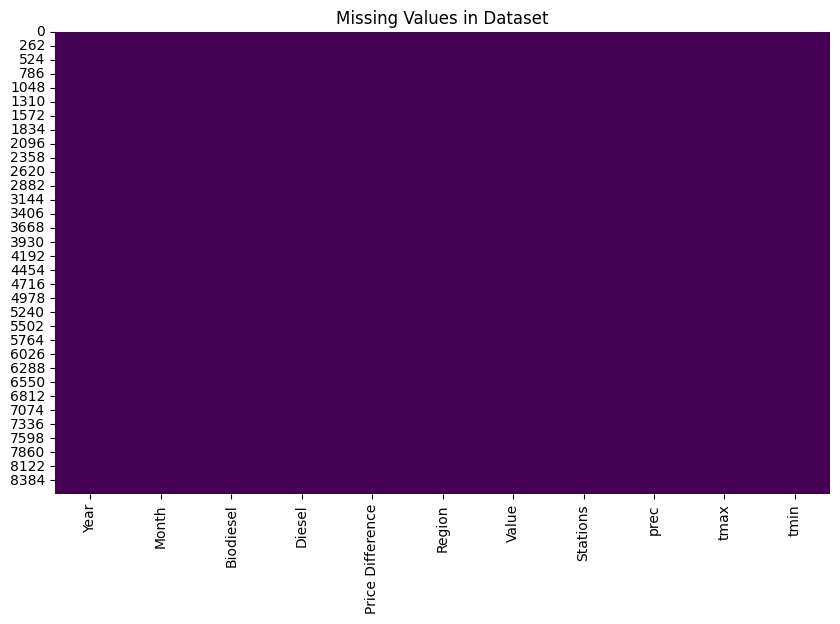

In [2]:
# Import necessary packages
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Here we are going to check whether our merged dataset has any missing values.
# Load the dataset
df = pd.read_csv('finished.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# We found that there are 24 missing values for precipitation. 
# While this maybe because of no rain in the region, we are not certain why the concerned vectors are completely empty. 
# So instead of inputting 0 for 24 missing values for precipitation column, we used ffill technique to deal this issue.

# Forward fill missing values
df['prec'] = df['prec'].fillna(method='ffill')

# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()


#### Removing Duplicates


Number of duplicate rows after handling: 0


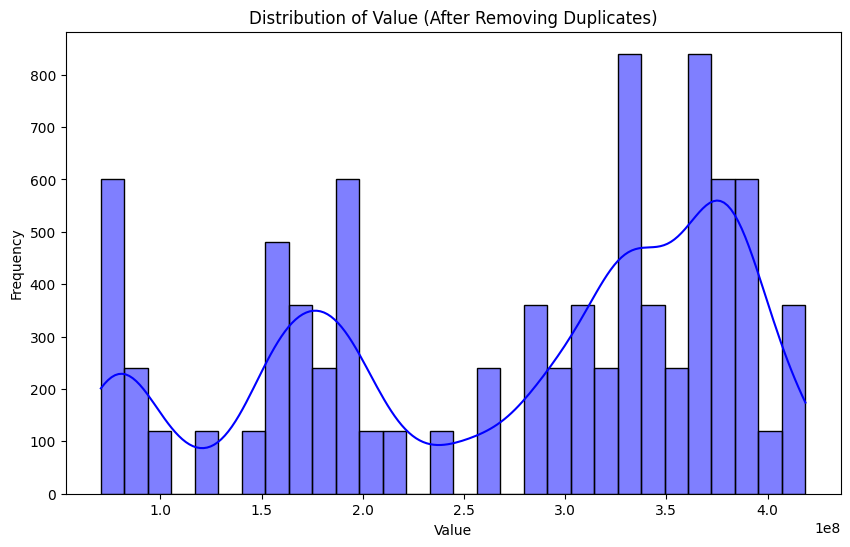

In [3]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that there are no more duplicate rows
duplicates_after = df.duplicated().sum()
print("\nNumber of duplicate rows after handling:", duplicates_after)

# Visualize distribution of the 'Value' column before and after removing duplicates
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True, color='blue', bins=30)
plt.title('Distribution of Value (After Removing Duplicates)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Encoding Categorical Variables

In [4]:
# In order for us to have a better understanding at the end, we decided to make more categorized items. 
# We believe this would help us to have a better understanding on this topic at the end (well it did not....)
# Convert categorical data into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Region', 'Stations'])

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

   Year  Month  Biodiesel  Diesel  Price Difference        Value   prec  tmax  \
0  2015      1       2.85     3.0             -0.15  369962000.0  17.04 -0.79   
1  2015      1       2.85     3.0             -0.15  369962000.0  17.20 -0.79   
2  2015      1       2.85     3.0             -0.15  369962000.0  28.97  0.29   
3  2015      1       2.85     3.0             -0.15  369962000.0   4.83  1.19   
4  2015      1       2.85     3.0             -0.15  369962000.0  16.27 -0.39   

    tmin  Region_central  ...  Stations_sioux city area  Stations_siouxcenter  \
0 -11.54            True  ...                     False                 False   
1 -11.54            True  ...                     False                 False   
2 -10.68            True  ...                     False                 False   
3  -9.76            True  ...                     False                 False   
4 -11.72            True  ...                     False                 False   

   Stations_siouxrapids  S

#### Scaling/Normalizing Data

   Year  Month  Biodiesel    Diesel  Price Difference     Value      prec  \
0  2015      1  -0.698536 -0.111444         -1.079356  0.898165 -1.032536   
1  2015      1  -0.698536 -0.111444         -1.079356  0.898165 -1.029790   
2  2015      1  -0.698536 -0.111444         -1.079356  0.898165 -0.827765   
3  2015      1  -0.698536 -0.111444         -1.079356  0.898165 -1.242113   
4  2015      1  -0.698536 -0.111444         -1.079356  0.898165 -1.045753   

       tmax      tmin  Region_central  ...  Stations_sioux city area  \
0 -1.421365 -1.422603            True  ...                     False   
1 -1.421365 -1.422603            True  ...                     False   
2 -1.325650 -1.341201            True  ...                     False   
3 -1.245888 -1.254121            True  ...                     False   
4 -1.385915 -1.439640            True  ...                     False   

   Stations_siouxcenter  Stations_siouxrapids  Stations_spencer  \
0                 False              

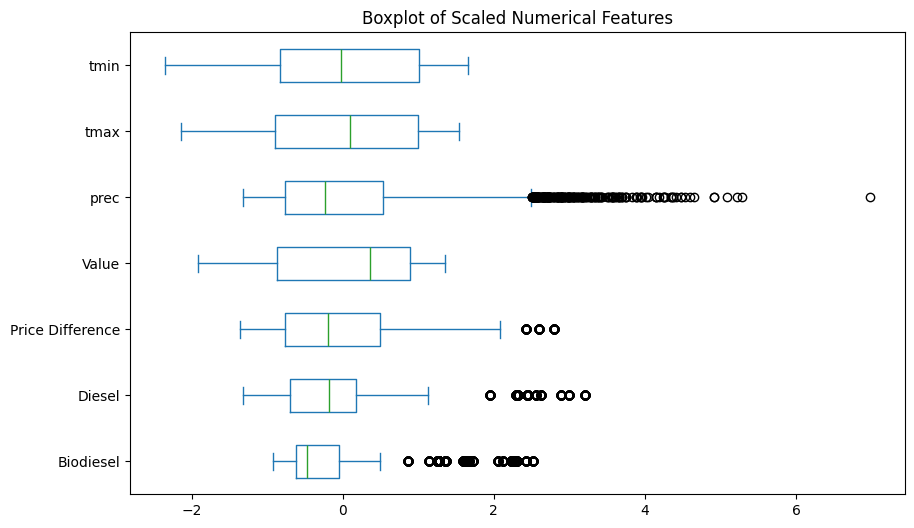

In [10]:
## Since our number ranges differently for each column, it would be hard for us to carry out thoughful regression analysis without standardizing. 
# So here we will use standardscaler from sklearn to carry out the task.

from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['Biodiesel', 'Diesel', 'Price Difference', 'Value', 'prec', 'tmax', 'tmin']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the normalized dataframe
print(df_encoded.head())

# Visualize the effect of scaling
df_scaled = df_encoded[numerical_cols]
df_scaled.plot(kind='box', figsize=(10, 6), vert=False)
plt.title('Boxplot of Scaled Numerical Features')
plt.show()

## Models & Results

#### Splitting the Dataset

In [6]:
from sklearn.model_selection import train_test_split

# Step 5: Splitting the Dataset
# Define features (X) and target (y)
X = df_encoded.drop('Value', axis=1)
y = df_encoded['Value']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (6912, 107), X_test: (1728, 107), y_train: (6912,), y_test: (1728,)


#### Training with Polynomial Regression Model

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.04819024060955296
R-squared: 0.9532848403774882


#### Training with Random Forest Regression

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.292182387798374e-06
R-squared: 0.9999948698088685


#### Hyperparameter Tuning and Model Evaluation for Random Forest Regression

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 3.734562801046618e-06
R-squared: 0.9999963797504399


#### Cross-Validation for Model Evaluation

Cross-validation MSE: [-2.43064663e-06 -7.55903271e-06 -1.15521529e-06 -3.57114236e-06
 -3.15629071e-06]
Mean CV MSE: -3.5744655415585713e-06


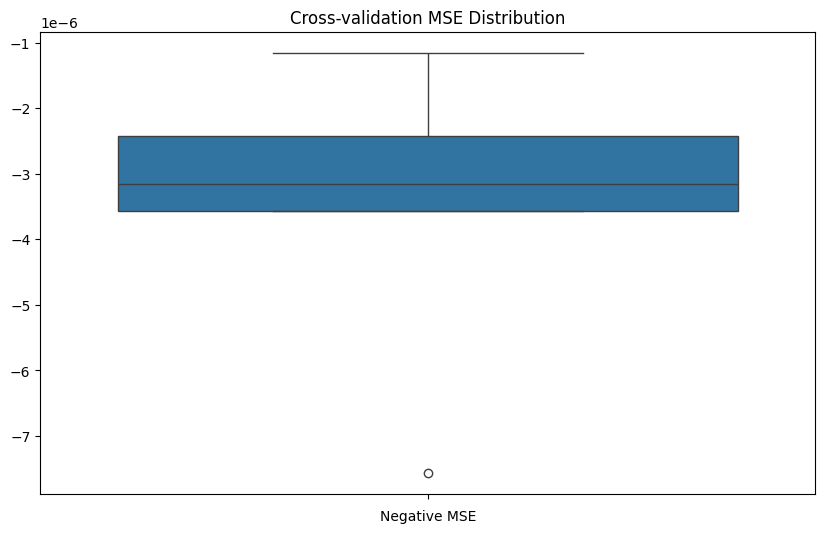

In [13]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print(f"Cross-validation MSE: {cv_scores}")
print(f"Mean CV MSE: {cv_scores.mean()}")

# Visualize the cross-validation MSE distribution
plt.figure(figsize=(10, 6))
sns.boxplot(cv_scores)
plt.title('Cross-validation MSE Distribution')
plt.xlabel('Negative MSE')
plt.show()

#### Training and Evaluating Random Forest Model with Optimized Hyperparameters

        Actual  Predicted
6805 -1.911015  -1.911015
4570 -0.750101  -0.750101
222   1.019258   1.019258
3984  0.578058   0.578058
318   1.019258   1.019258


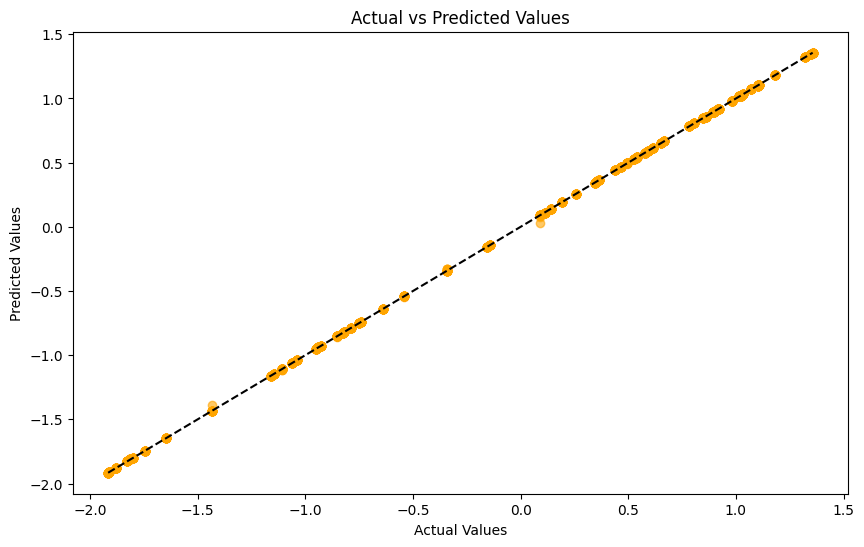

In [15]:
# Initialize the Random Forest Regressor model with the best hyperparameters
best_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Display the first few predictions along with actual values for comparison
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()